In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('performance.csv')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 34 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Unnamed: 0                                                                  1009 non-null   int64  
 1   Adm_Year                                                                    1009 non-null   float64
 2   Gender                                                                      1009 non-null   object 
 3   Age                                                                         1009 non-null   float64
 4   HSC_Pass_Year                                                               1009 non-null   float64
 5   Program                                                                     1009 non-null   object 
 6   Merit_Scholarship                               

In [ ]:
#summary statistic numerical columns
data.describe()

,Unnamed: 0,Adm_Year,Age,HSC_Pass_Year,Curr_Sem1,Study_Hours1,Study_Sessions1,SM_Hours1,Avg_Attendance1,Skill_Dev_Hours1,Prev_SGPA1,Curr_CGPA1,Completed_Credits1,Family_Income1
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,673.108028,2040.321110,21.368285,2019.251734,43.000991,3.334616,2.066898,3.439296,88.111001,2.224975,2.756482,3.211343,76.936571,6.349576e+04
std,311.377223,629.677177,1.614943,1.346681,266.874155,2.096762,1.034492,2.439363,16.079094,1.473957,0.858012,0.731698,47.733885,7.927658e+04
min,7.000000,2013.000000,18.000000,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.530000e+03
25%,410.000000,2020.000000,20.000000,2019.000000,3.000000,2.000000,1.000000,2.000000,80.000000,1.000000,2.110000,2.880000,24.000000,3.000000e+04
50%,685.000000,2021.000000,21.000000,2020.000000,8.000000,3.000000,2.000000,3.000000,95.000000,2.000000,2.770000,3.390000,85.000000,5.000000e+04
75%,941.000000,2022.000000,22.000000,2020.000000,10.000000,4.000000,2.000000,4.000000,100.000000,3.000000,3.480000,3.710000,122.000000,7.700000e+04
max,1193.000000,22022.000000,26.000000,2028.000000,2022.000000,30.000000,10.000000,20.000000,100.000000,20.000000,5.000000,4.670000,147.000000,2.000000e+06


In [ ]:
#first few rows
data.head()

,Unnamed: 0,Adm_Year,Gender,Age,HSC_Pass_Year,Program,Merit_Scholarship,Uni_Transport,Learn_Mode,Smartphone,...,SM_Hours1,Avg_Attendance1,Skills1,Skill_Dev_Hours1,Interest_Area1,Prev_SGPA1,Curr_CGPA1,Completed_Credits1,Diploma,Family_Income1
0,7,2021.0,Female,22.0,2019.0,BCSE,Yes,No,Offline,Yes,...,2.0,100.0,Web development skill(Frontend),1.0,Networking,3.80,3.64,35.0,False,32500.0
1,11,2021.0,Male,22.0,2019.0,BCSE,No,No,Offline,Yes,...,2.0,90.0,Programming,1.0,Data Science,3.40,3.53,35.0,False,20000.0
2,15,2021.0,Male,20.0,2020.0,BCSE,Yes,Yes,Offline,Yes,...,1.0,95.0,Programming,3.0,Machine Learning / Deep Learning,3.93,3.89,35.0,False,30000.0
3,18,2021.0,Male,21.0,2020.0,BCSE,Yes,No,Online,Yes,...,3.0,95.0,Programming,1.0,Artificial Intelligence,3.10,3.50,35.0,False,25000.0
4,20,2021.0,Female,21.0,2019.0,BCSE,Yes,No,Offline,Yes,...,2.0,96.0,Web development skill(Frontend),1.0,Web Development,3.81,3.65,34.0,False,30000.0


In [ ]:
#check for missing values
data.isnull().sum()

Unnamed: 0                                                                    0
Adm_Year                                                                      0
Gender                                                                        0
Age                                                                           0
HSC_Pass_Year                                                                 0
Program                                                                       0
Merit_Scholarship                                                             0
Uni_Transport                                                                 0
Learn_Mode                                                                    0
Smartphone                                                                    0
PC                                                                            0
Eng_Proficiency                                                               0
Probation                               

In [ ]:
#handle missing values
categorical_cols = data.select_dtypes(include=['object']).columns.drop('Target')

data['Interest_Area1'].fillna(data['Interest_Area1'].mode()[0],inplace =True)
data['Skills1'].fillna(data['Skills1'].mode()[0],inplace =True)

data.isnull().sum()



C:\Users\keiim\AppData\Local\Temp\ipykernel_9548\2144536244.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Interest_Area1'].fillna(data['Interest_Area1'].mode()[0],inplace =True)
C:\Users\keiim\AppData\Local\Temp\ipykernel_9548\2144536244.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

Unnamed: 0                                                                    0
Adm_Year                                                                      0
Gender                                                                        0
Age                                                                           0
HSC_Pass_Year                                                                 0
Program                                                                       0
Merit_Scholarship                                                             0
Uni_Transport                                                                 0
Learn_Mode                                                                    0
Smartphone                                                                    0
PC                                                                            0
Eng_Proficiency                                                               0
Probation                               

In [ ]:
#target distribution
data['Target'].value_counts()

Target
Poor         503
Average      272
Good         178
Excellent     56
Name: count, dtype: int64

In [ ]:
#encoding target varibale
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])

print(data['Target'])


0       2
1       2
2       2
3       0
4       2
       ..
1004    3
1005    3
1006    3
1007    3
1008    3
Name: Target, Length: 1009, dtype: int32


In [ ]:
#Standardize numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

standard_scaler = StandardScaler()
data[numerical_cols] = standard_scaler.fit_transform(data[numerical_cols])

print(numerical_cols)

Index(['Unnamed: 0', 'Adm_Year', 'Age', 'HSC_Pass_Year', 'Curr_Sem1',
       'Study_Hours1', 'Study_Sessions1', 'SM_Hours1', 'Avg_Attendance1',
       'Skill_Dev_Hours1', 'Prev_SGPA1', 'Curr_CGPA1', 'Completed_Credits1',
       'Family_Income1'],
      dtype='object')


In [ ]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data.head()

,Unnamed: 0,Adm_Year,Age,HSC_Pass_Year,Target,Curr_Sem1,Study_Hours1,Study_Sessions1,SM_Hours1,Avg_Attendance1,...,Interest_Area1_Software,"Interest_Area1_Software, App","Interest_Area1_Software, BCS","Interest_Area1_Software, Blockchain Engineering","Interest_Area1_Software, Hardware",Interest_Area1_Teaching,Interest_Area1_UI/UX,Interest_Area1_Web Development,Interest_Area1_Web developing,Interest_Area1_confuse
0,-2.140293,-0.030699,0.391362,-0.187022,2,-0.146212,-0.636829,-0.064700,-0.590322,0.739774,...,False,False,False,False,False,False,False,False,False,False
1,-2.127440,-0.030699,0.391362,-0.187022,2,-0.146212,0.078915,-0.064700,-0.590322,0.117540,...,False,False,False,False,False,False,False,False,False,False
2,-2.114588,-0.030699,-0.847686,0.555912,2,-0.146212,-0.636829,-1.031837,-1.000469,0.428657,...,False,False,False,False,False,False,False,False,False,False
3,-2.104948,-0.030699,-0.228162,0.555912,0,-0.146212,-1.113991,-0.064700,-0.180176,0.428657,...,False,False,False,False,False,False,False,False,False,False
4,-2.098522,-0.030699,-0.228162,-0.187022,2,-0.146212,-0.159666,-0.064700,-0.590322,0.490880,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
#split data into 70% training and 30% testing

x = data.drop(columns=['Target']) 
y = data['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
#first model evaluation
# -logistic regression
# -support vector machine(SVM)
# -multi-layer perceptron

log_reg = LogisticRegression(solver='saga', random_state=0)
svm = SVC(kernel='rbf', random_state=0)
mlp = MLPClassifier(random_state=0)

In [ ]:
#Training models
log_reg.fit(x_train, y_train)
svm.fit(x_train, y_train)
mlp.fit(x_train, y_train)

c:\Users\keiim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\keiim\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

Logistic Regression Accuracy: 0.7524752475247525
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        73
           1       0.46      0.50      0.48        12
           2       0.66      0.60      0.63        65
           3       0.88      0.93      0.90       153

    accuracy                           0.75       303
   macro avg       0.65      0.65      0.65       303
weighted avg       0.75      0.75      0.75       303



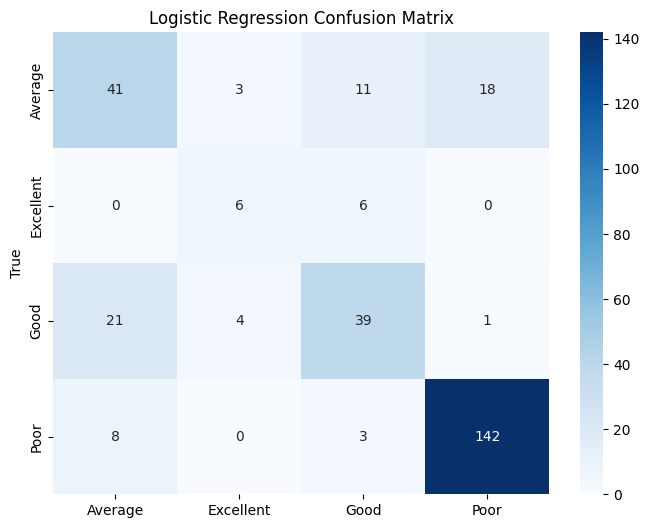

SVM Accuracy: 0.7722772277227723
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        73
           1       1.00      0.08      0.15        12
           2       0.65      0.69      0.67        65
           3       0.90      0.93      0.91       153

    accuracy                           0.77       303
   macro avg       0.79      0.58      0.59       303
weighted avg       0.78      0.77      0.76       303



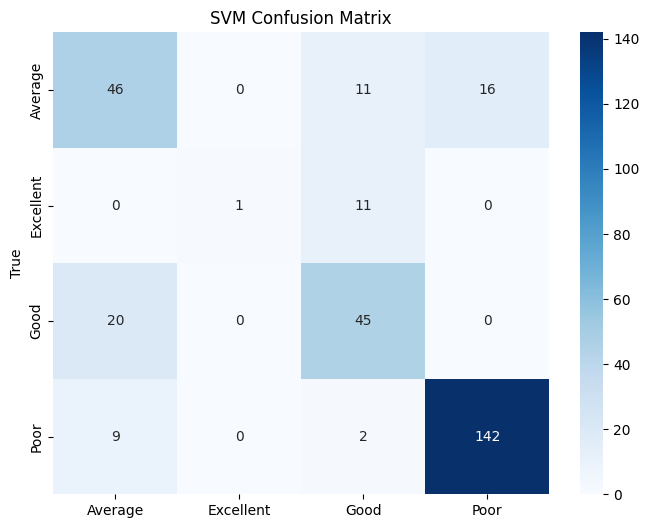

MLP Accuracy: 0.7293729372937293
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        73
           1       0.38      0.67      0.48        12
           2       0.64      0.60      0.62        65
           3       0.91      0.88      0.89       153

    accuracy                           0.73       303
   macro avg       0.62      0.67      0.64       303
weighted avg       0.74      0.73      0.73       303



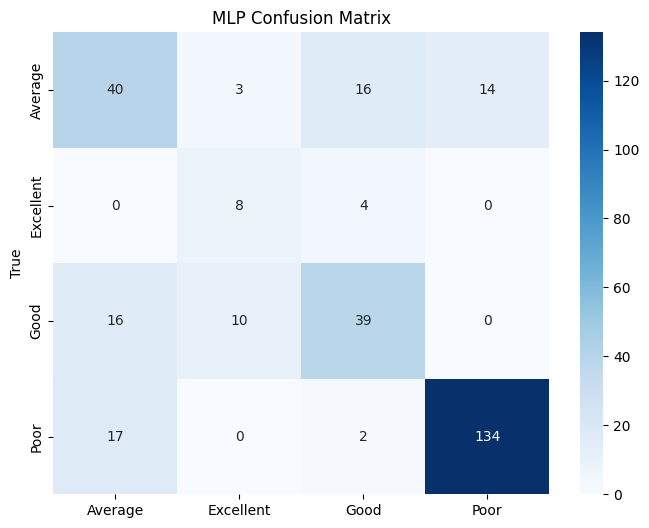

In [ ]:
#model accuracy on testing set
#Classification report

models = {'Logistic Regression': log_reg, 'SVM': svm, 'MLP': mlp}
for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d",xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,cmap="Blues")
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True')
    plt.show()

In [428]:
#hyperparameter tuning for logistic and svm

log_reg_params = {'C': [0.01, 0.1, 1, 10, 20, 50, 100]}
svm_params = {'C': [0.01, 0.1, 1, 10, 20, 50, 100]}

log_reg_gs = GridSearchCV(LogisticRegression(solver='saga', random_state=0, max_iter=5000), log_reg_params, cv=5, scoring='accuracy')
svm_gs = GridSearchCV(SVC(kernel='rbf', random_state=0, max_iter=2000), svm_params, cv=5, scoring='accuracy')

log_reg_gs.fit(x_train, y_train)
svm_gs.fit(x_train, y_train)

print(f"Best parameters: {log_reg_gs.best_params_}")
print(f"Best parameters: {svm_gs.best_params_}")

Best parameters: {'C': 1}
Best parameters: {'C': 20}
